In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/cleaned/sentiment2.csv', index_col=0)

In [3]:
df1 = pd.read_csv('../data/cleaned/sampled.csv', index_col=0)

In [4]:
df = df.rename(columns={'id': 'tweet_id'}).merge(df1, on='tweet_id', how='inner')

In [5]:
sentiment_probs = df[[f's_{i}' for i in range(5)]].values
sentiment_values = np.stack([np.array([1, 2, 3, 4, 5])] * sentiment_probs.shape[0])
s_values = np.multiply(sentiment_probs, sentiment_values).sum(axis=1)
s_values = s_values - 2.5 # Center at 0

In [6]:
advantage_probs = df[[f'a_{i}' for i in range(2)]].values
advantage_values = np.stack([np.array([0, 1])] * advantage_probs.shape[0])
a_values = np.multiply(advantage_probs, advantage_values).sum(axis=1)
a_values = a_values - 0.5 # Center at 0

In [7]:
df['a_score'] = a_values
df['s_score'] = s_values

In [120]:
df

,tweet_id,s_0,s_1,s_2,s_3,s_4,a_0,a_1,r_0,r_1,r_2,body,Date,ticker_symbol,a_score,s_score,Date_
0,1079897516785709056,0.2,0.2,0.2,0.2,0.2,0.5,0.5,0.8,0.2,0.0,ACTIVE TRADERS Try one of these FREE trading g...,2019-01-01 00:30:06,AAPL,0.0,0.5,2019-01-01
1,1079902561812054018,0.2,0.3,0.2,0.2,0.1,0.5,0.5,0.6,0.3,0.1,VIN update tomorrow 2pm EST. Unless @elonmusk ...,2019-01-01 00:50:09,TSLA,0.0,0.2,2019-01-01
2,1079906964379860994,0.2,0.3,0.2,0.2,0.1,0.7,0.3,0.8,0.2,0.0,Mikhail's Year in Review: 2018's Best Games an...,2019-01-01 01:07:38,AAPL,-0.2,0.2,2019-01-01
3,1079908725438271488,0.2,0.3,0.3,0.1,0.1,0.8,0.2,0.9,0.1,0.0,Join @RobinhoodApp and we'll both get a stock ...,2019-01-01 01:14:38,AAPL,-0.3,0.1,2019-01-01
4,1079913035635064834,0.2,0.3,0.2,0.2,0.1,0.5,0.5,0.6,0.3,0.1,SeekingAlpha Comments Average Sentiment$AMZN $...,2019-01-01 01:31:46,AMZN,0.0,0.2,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22445,1212108450332893190,0.2,0.0,0.0,0.0,0.8,0.9,0.1,0.7,0.3,0.0,worst is over #india #GDP rebound to help $AMZ...,2019-12-31 20:29:09,GOOGL,-0.4,1.7,2019-12-31
22446,1212116595088248833,0.2,0.0,0.0,0.0,0.8,0.9,0.1,0.7,0.3,0.0,$AAPL That’s a finish - that’s a PROPER FINISH,2019-12-31 21:01:30,AAPL,-0.4,1.7,2019-12-31
22447,1212134052578365440,0.0,0.6,0.2,0.1,0.0,0.7,0.3,0.8,0.2,0.0,"$AAPL #patent 10,523,447 Obtaining and using t...",2019-12-31 22:10:53,AAPL,-0.2,-0.3,2019-12-31
22448,1212153081334521856,0.2,0.0,0.0,0.0,0.8,0.9,0.1,0.7,0.3,0.0,Happy & Electrifying New Year to all my $TSLA ...,2019-12-31 23:26:29,TSLA,-0.4,1.7,2019-12-31


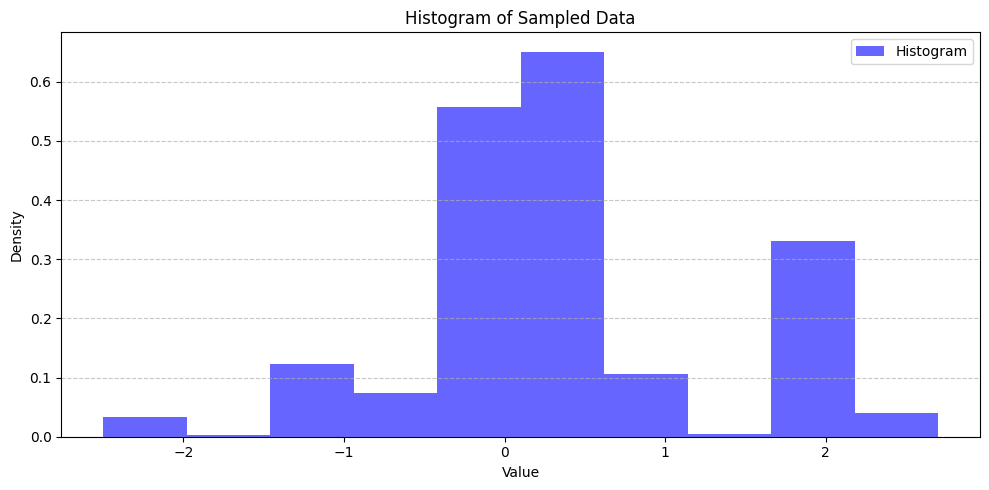

In [8]:
# 2. Display its histogram
plt.figure(figsize=(10, 5))
plt.hist(s_values, bins=10, density=True, alpha=0.6, color='blue', label='Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Sampled Data')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

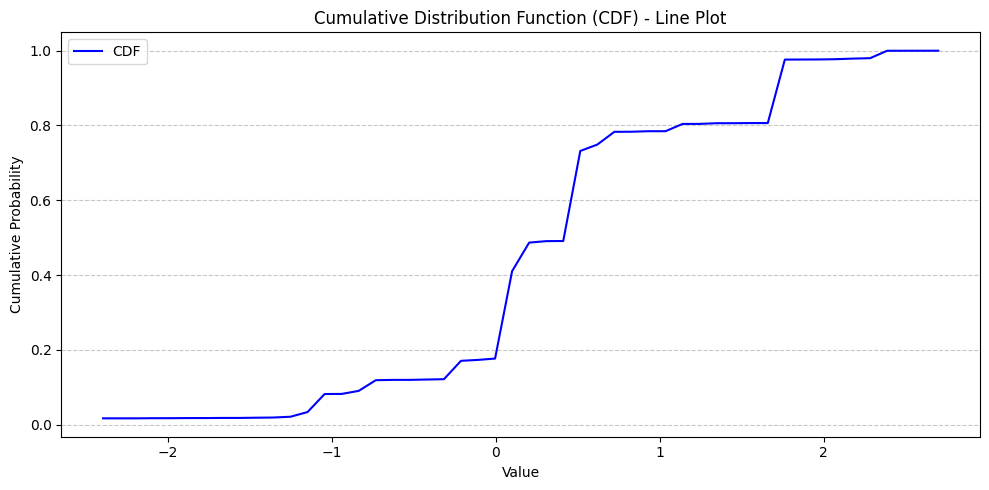

In [9]:
# Calculate histogram and cumulative sum
hist, bin_edges = np.histogram(s_values, bins=50, density=True)
cdf = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])  # multiply by bin width to normalize

# Plotting the CDF as a line
plt.figure(figsize=(10, 5))
plt.plot(bin_edges[1:], cdf, 'b-', label='CDF')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) - Line Plot')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

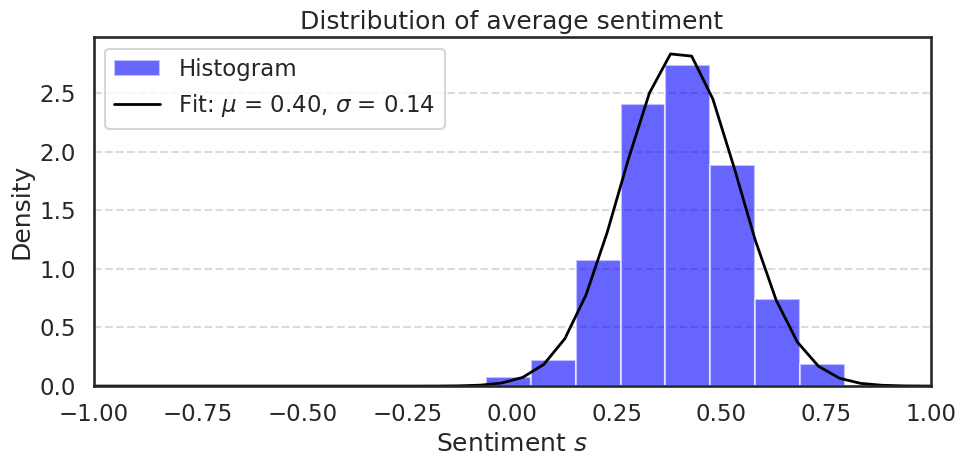

In [109]:
from scipy.stats import norm
# Fitting a Gaussian curve to the histogram
mu, std = norm.fit(daily_avg1.s_score)
xmin, xmax = -2.5, 2.5
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# 3. Plotting the histogram and Gaussian fit
plt.figure(figsize=(10, 5))
plt.hist(daily_avg1.s_score, bins=8, density=True, alpha=0.6, color='blue', label='Histogram')
plt.plot(x, p, 'k', linewidth=2, label=f'Fit: $\mu$ = {mu:.2f}, $\sigma$ = {std:.2f}')
plt.xlabel('Sentiment $s$')
plt.ylabel('Density')
plt.title('Distribution of average sentiment')
plt.xlim([-1, 1])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("../imgs/avg_sentiment.png")
plt.show()

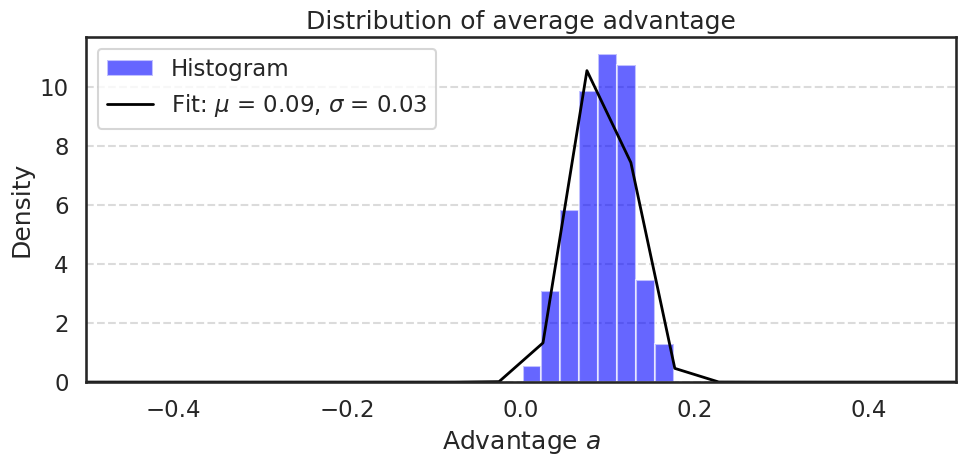

In [117]:
from scipy.stats import norm
# Fitting a Gaussian curve to the histogram

s = daily_avg1.a_score
mu, std = norm.fit(s)
xmin, xmax = -2.5, 2.5
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# 3. Plotting the histogram and Gaussian fit
plt.figure(figsize=(10, 5))
plt.hist(s, bins=8, density=True, alpha=0.6, color='blue', label='Histogram')
plt.plot(x, p, 'k', linewidth=2, label=f'Fit: $\mu$ = {mu:.2f}, $\sigma$ = {std:.2f}')
plt.xlabel('Advantage $a$')
plt.ylabel('Density')
plt.title('Distribution of average advantage')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("../imgs/avg_advantage.png")


plt.show()

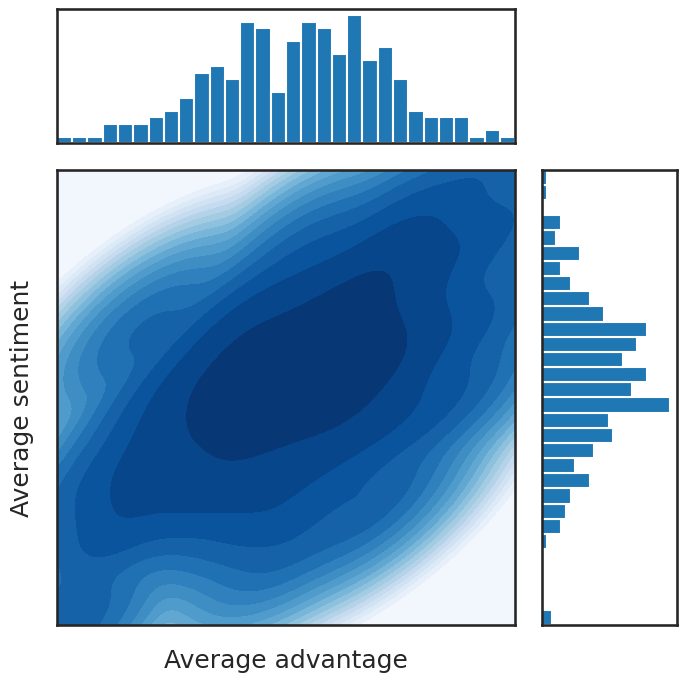

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


x = daily_avg1.a_score
y = daily_avg1.s_score

# Create a grid of points
xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

# Calculate the KDE
kernel = gaussian_kde(np.vstack([x, y]))
Z = np.reshape(kernel(positions).T, X.shape)

# Apply a logarithmic scale transformation to Z
Z_log = np.log(Z + 1e-6)  # Adding a small constant to avoid log(0)

# Create figure and grid for subplots
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

# Main axes for the contour plot
main_ax = fig.add_subplot(grid[1:, :-1])
# Use the transformed Z_log for contour levels
contour = main_ax.contourf(X, Y, Z_log, levels=20, cmap='Blues')

# Histogram for x on top
x_hist = fig.add_subplot(grid[0, :-1], xticklabels=[], sharex=main_ax)
x_hist.hist(x, bins=30, density=True)


# Histogram for y on the right
y_hist = fig.add_subplot(grid[1:, -1], yticklabels=[], sharey=main_ax)
y_hist.hist(y, bins=30, orientation='horizontal', density=True)

# Remove ticks and labels for the histograms
x_hist.xaxis.set_visible(False)
y_hist.yaxis.set_visible(False)
x_hist.yaxis.set_visible(False)
y_hist.xaxis.set_visible(False)

main_ax.grid(True)
# Set labels for main_ax
main_ax.set_xlabel('Average advantage')
main_ax.set_ylabel('Average sentiment')

# # Optional: Add color bar
# cbar = plt.colorbar(contour, ax=main_ax, aspect=5)
# cbar.set_label('Log density')

# plt.savefig('../imgs/multivariate_sentiment.png')
plt.show()


In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch S&P 500 data for 2019
sp500 = yf.download('^GSPC', start='2019-01-01', end='2020-01-01')

# Calculate daily change
sp500['Daily Change'] = sp500['Close'].diff()



[*********************100%%**********************]  1 of 1 completed


In [16]:
sp500['Date_'] = pd.to_datetime(sp500.index)

In [17]:
sp500.reset_index(drop=True, inplace=True)

In [18]:
df['Date_'] = pd.to_datetime(pd.to_datetime(df['Date']).dt.date)

In [19]:
daily_avg = df.merge(sp500, on='Date_', how='left').groupby('Date_')[['s_score', 'a_score']].mean().reset_index()

In [20]:
daily_avg1 = daily_avg.merge(sp500, on='Date_', how='inner')

In [21]:
daily_avg1.fillna(0, inplace=True)

In [22]:
daily_avg1.rename(columns={'Daily Change': 'd_score'}, inplace=True)

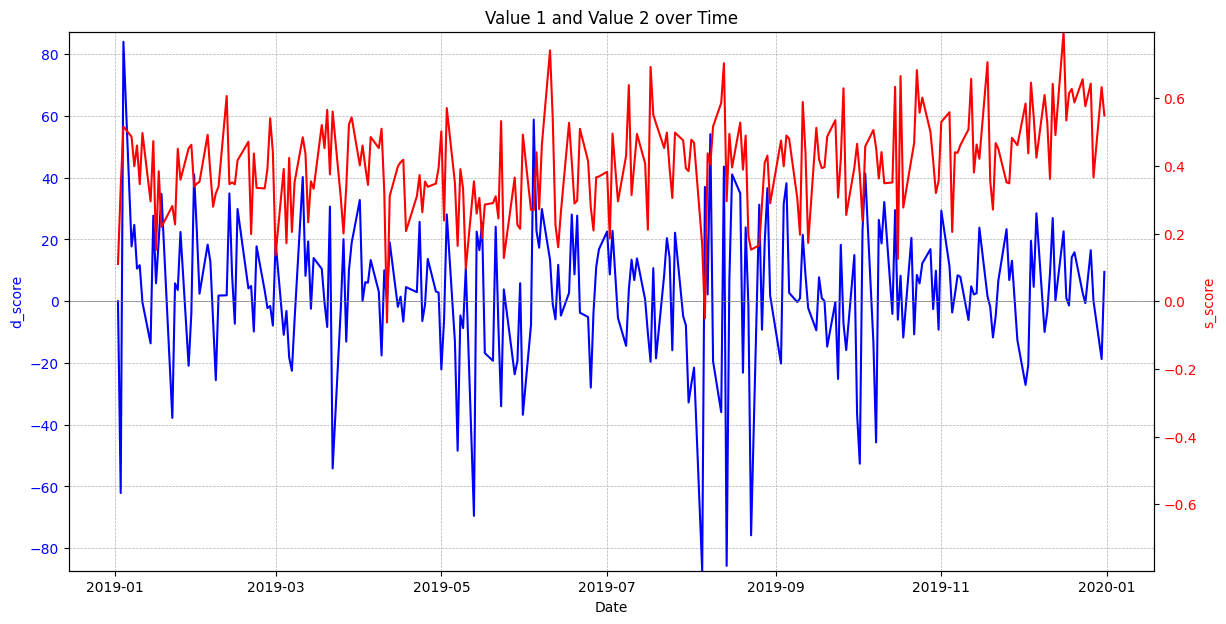

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

max_abs_value1 = abs(daily_avg1['d_score']).max()
max_abs_value2 = abs(daily_avg1['s_score']).max()

# Plot value1 on the primary (left) y-axis
ax1.set_ylabel('d_score', color='blue')
ax1.set_ylim(-max_abs_value1, max_abs_value1)  # Set limits based on max absolute value
ax1.plot(daily_avg1['Date_'], daily_avg1['d_score'], color='blue', label='Daily Change')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Create a secondary (right) y-axis for value2
ax2 = ax1.twinx()
ax2.set_ylim(-max_abs_value2, max_abs_value2)  # Set limits based on max absolute value
ax2.set_ylabel('s_score', color='red')
ax2.plot(daily_avg1['Date_'], daily_avg1['s_score'], color='red', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='red')

ax1.axhline(0, color='grey', linestyle='-', linewidth=0.5)  # Draw a horizontal line at y=0
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.title('Value 1 and Value 2 over Time')
plt.show()

In [69]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming x and y are your two time series arrays
x = daily_avg1['s_score']
y = daily_avg1['d_score']  # Your target time series data

data = np.column_stack([y, x])  # Stack as columns with y as the first column

# The second parameter is the number of lags to test for
gc_test = grangercausalitytests(data, 4, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2289  , p=0.6328  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.2316  , p=0.6303  , df=1
likelihood ratio test: chi2=0.2315  , p=0.6304  , df=1
parameter F test:         F=0.2289  , p=0.6328  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1425  , p=0.3207  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=2.3317  , p=0.3117  , df=2
likelihood ratio test: chi2=2.3209  , p=0.3133  , df=2
parameter F test:         F=1.1425  , p=0.3207  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4088  , p=0.7468  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=1.2619  , p=0.7382  , df=3
likelihood ratio test: chi2=1.2587  , p=0.7390  , df=3
parameter F test:         F=0.4088  , p=0.7468  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4259  , p=0.7899  

/home/wsanf/code/dl_proj/venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [71]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming x and y are your two time series arrays
x = -1 * daily_avg1['a_score']
y = daily_avg1['d_score']  # Your target time series data

data = np.column_stack([y, x])  # Stack as columns with y as the first column

# The second parameter is the number of lags to test for
gc_test = grangercausalitytests(data, 4, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0743  , p=0.7854  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.0752  , p=0.7839  , df=1
likelihood ratio test: chi2=0.0752  , p=0.7839  , df=1
parameter F test:         F=0.0743  , p=0.7854  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8541  , p=0.1588  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=3.7839  , p=0.1508  , df=2
likelihood ratio test: chi2=3.7556  , p=0.1529  , df=2
parameter F test:         F=1.8541  , p=0.1588  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7671  , p=0.1541  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=5.4548  , p=0.1414  , df=3
likelihood ratio test: chi2=5.3959  , p=0.1450  , df=3
parameter F test:         F=1.7671  , p=0.1541  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7766  , p=0.1342  

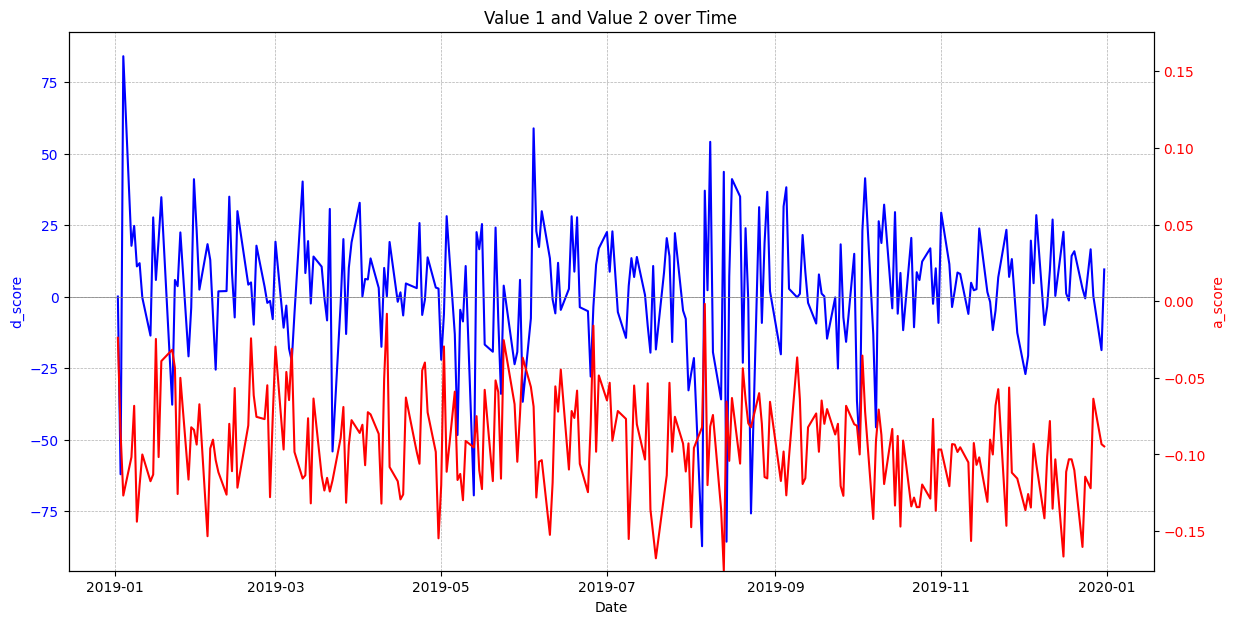

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

max_abs_value1 = abs(daily_avg1['d_score']).max()
max_abs_value2 = abs(daily_avg1['a_score']).max()

# Plot value1 on the primary (left) y-axis
ax1.set_ylabel('d_score', color='blue')
ax2.set_ylim(-max_abs_value1, max_abs_value1)  # Set limits based on max absolute value
ax1.plot(daily_avg1['Date_'], daily_avg1['d_score'], color='blue', label='Daily Change')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Create a secondary (right) y-axis for value2
ax2 = ax1.twinx()
ax2.set_ylim(-max_abs_value2, max_abs_value2)  # Set limits based on max absolute value
ax2.set_ylabel('a_score', color='red')
ax2.plot(daily_avg1['Date_'], daily_avg1['a_score'], color='red', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='red')

ax1.axhline(0, color='grey', linestyle='-', linewidth=0.5)  # Draw a horizontal line at y=0
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.title('Value 1 and Value 2 over Time')
plt.show()

In [30]:
correlation = daily_avg1.s_score.corr(daily_avg1.d_score)
print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.10


In [127]:
arr1 = daily_avg1.s_score
arr2 = daily_avg1.d_score
arr3 = -1 * daily_avg1.a_score

In [128]:
def running_average(data, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'valid')

def get_score(arr, arr_, shift=0, window=0):
    if shift:
        arr = arr[shift:]
        arr_ = arr_[:-shift]
    if window:
        arr = running_average(arr, window)
        arr_ = running_average(arr_, window)
    return np.logical_not(np.logical_xor((arr > 0).astype(int), (arr_ > 0).astype(int))).sum() / arr.shape[0]
    


sw = [
    (0, 0),
    (3, 0),
    (5, 0),
    (0, 1),
    (3, 1),
    (5, 1),
    (0, 2),
    (3, 2),
    (5, 2)
]

print('Sentiment')
for w, s in sw:
    print(f'Window: {w} | Shift {s} | {get_score(arr1, arr2, w, s)}')


print('Advantage')
for w, s in sw:
    print(f'Window: {w} | Shift {s} | {get_score(arr3, arr2, w, s)}')

Sentiment
Window: 0 | Shift 0 | 0.5833333333333334
Window: 3 | Shift 0 | 0.5943775100401606
Window: 5 | Shift 0 | 0.6032388663967612
Window: 0 | Shift 1 | 0.5833333333333334
Window: 3 | Shift 1 | 0.5903614457831325
Window: 5 | Shift 1 | 0.5910931174089069
Window: 0 | Shift 2 | 0.6374501992031872
Window: 3 | Shift 2 | 0.6411290322580645
Window: 5 | Shift 2 | 0.6382113821138211
Advantage
Window: 0 | Shift 0 | 0.5912698412698413
Window: 3 | Shift 0 | 0.6024096385542169
Window: 5 | Shift 0 | 0.611336032388664
Window: 0 | Shift 1 | 0.5912698412698413
Window: 3 | Shift 1 | 0.5903614457831325
Window: 5 | Shift 1 | 0.5910931174089069
Window: 0 | Shift 2 | 0.6374501992031872
Window: 3 | Shift 2 | 0.6411290322580645
Window: 5 | Shift 2 | 0.6382113821138211


In [39]:
import numpy as np
from scipy.stats import pearsonr

# Point-by-point Pearson correlation
corr_point_by_point, _ = pearsonr(array1, array2)
print(f"Point-by-point Pearson correlation: {corr_point_by_point}")

# Function to calculate running average with a given window size


# Running 5-day average Pearson correlation
array1_5day_avg = running_average(array1, 5)
array2_5day_avg = running_average(array2, 5)
corr_5day_avg, _ = pearsonr(array1_5day_avg, array2_5day_avg)
print(f"5-day average Pearson correlation: {corr_5day_avg}")

# Running 10-day average Pearson correlation
array1_10day_avg = running_average(array1, 10)
array2_10day_avg = running_average(array2, 10)
corr_10day_avg, _ = pearsonr(array1_10day_avg, array2_10day_avg)
print(f"10-day average Pearson correlation: {corr_10day_avg}")


Point-by-point Pearson correlation: 0.10176974544446299
5-day average Pearson correlation: 0.22095735933645458
10-day average Pearson correlation: 0.25235010092487803


In [40]:
array1 = daily_avg1.s_score  # Replace with your actual data
array2 = daily_avg1.d_score  # Replace with your actual data

# Function to calculate running average with a given window size
def running_average(data, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'valid')

# Function to calculate Pearson correlation with optional shifting
def calculate_correlation(array1, array2, shift=0, window_size=None):
    if shift > 0:
        array1 = array1[shift:]  # Remove the first 'shift' elements
        array2 = array2[:-shift]  # Remove the last 'shift' elements
    elif shift < 0:
        array1 = array1[:shift]  # Keep until the 'shift' element from the last
        array2 = array2[-shift:]  # Start from the '-shift' element

    if window_size:
        array1 = running_average(array1, window_size)
        array2 = running_average(array2, window_size)

    correlation, _ = pearsonr(array1, array2)
    return correlation

# Point-by-point Pearson correlation without shift
print(f"Point-by-point Pearson correlation: {calculate_correlation(array1, array2)}")

# 1-day shift
print(f"1-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=1)}")

# 3-day shift
print(f"3-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=3)}")

# Running 5-day average Pearson correlation with 1-day and 3-day shift
print(f"5-day average with 1-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=1, window_size=5)}")
print(f"5-day average with 3-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=3, window_size=5)}")

# Running 10-day average Pearson correlation with 1-day and 3-day shift
print(f"10-day average with 1-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=1, window_size=10)}")
print(f"10-day average with 3-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=3, window_size=10)}")


Point-by-point Pearson correlation: 0.10176974544446299
1-day shift Pearson correlation: 0.12273075529352664
3-day shift Pearson correlation: 0.09182445721835415
5-day average with 1-day shift Pearson correlation: 0.2659438791046495
5-day average with 3-day shift Pearson correlation: 0.2581198559503157
10-day average with 1-day shift Pearson correlation: 0.268292665640838
10-day average with 3-day shift Pearson correlation: 0.236894666441226


In [67]:
array1 = -1 * daily_avg1.a_score  # Replace with your actual data
array2 = daily_avg1.d_score  # Replace with your actual data

# Function to calculate running average with a given window size
def running_average(data, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'valid')

# Function to calculate Pearson correlation with optional shifting
def calculate_correlation(array1, array2, shift=0, window_size=None):
    if shift > 0:
        array1 = array1[shift:]  # Remove the first 'shift' elements
        array2 = array2[:-shift]  # Remove the last 'shift' elements
    elif shift < 0:
        array1 = array1[:shift]  # Keep until the 'shift' element from the last
        array2 = array2[-shift:]  # Start from the '-shift' element

    if window_size:
        array1 = running_average(array1, window_size)
        array2 = running_average(array2, window_size)

    correlation, _ = pearsonr(array1, array2)
    return correlation

# Point-by-point Pearson correlation without shift
print(f"Point-by-point Pearson correlation: {calculate_correlation(array1, array2)}")

# 1-day shift
print(f"1-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=1)}")

# 3-day shift
print(f"3-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=3)}")

# Running 5-day average Pearson correlation with 1-day and 3-day shift
print(f"5-day average with 1-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=1, window_size=5)}")
print(f"5-day average with 3-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=3, window_size=5)}")

# Running 10-day average Pearson correlation with 1-day and 3-day shift
print(f"10-day average with 1-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=1, window_size=10)}")
print(f"10-day average with 3-day shift Pearson correlation: {calculate_correlation(array1, array2, shift=3, window_size=10)}")

Point-by-point Pearson correlation: 0.0490411185819927
1-day shift Pearson correlation: 0.07274202038463491
3-day shift Pearson correlation: 0.030690295922722037
5-day average with 1-day shift Pearson correlation: 0.1457100028598788
5-day average with 3-day shift Pearson correlation: 0.16829527411909506
10-day average with 1-day shift Pearson correlation: 0.1648313642914423
10-day average with 3-day shift Pearson correlation: 0.11439213374424094


In [119]:
daily_avg1.to_csv("../data/cleaned/full.csv")